In [1]:
from chebGreen import ChebGreen
import numpy as np
import matplotlib.pyplot as plt

from chebGreen.chebpy2 import Quasimatrix
from chebGreen.chebpy2.chebpy import chebfun
from chebGreen.chebpy2 import Chebfun2

# %env TF_MLC_LOGGING=1
# %env TF_CPP_MIN_LOG_LEVEL=2

In [2]:
Theta = [0.8,0.9,0.95]
domain = [-1,1,-1,1]
generateData = True
script = "generate_fractional"
example = "fractional_laplacian"
homogeneousBC = False
frac = ChebGreen(Theta, domain, generateData, script, example, homogeneousBC)

Generating dataset for example 'fractional_laplacian'
Number of samples: 250
Length scale: 0.01
Nf: 250
Nu: 100
Noise: 0%
---------------------------------------
> In chebfun2/constructor (line 121)
In chebfun2 (line 82)
In generate_fractional (line 31) 
Step = 1/250
Step = 2/250
Step = 3/250
Step = 4/250
Step = 5/250
Step = 6/250
Step = 7/250
Step = 8/250
Step = 9/250
Step = 10/250
Step = 11/250
Step = 12/250
Step = 13/250
Step = 14/250
Step = 15/250
Step = 16/250
Step = 17/250
Step = 18/250
Step = 19/250
Step = 20/250
Step = 21/250
Step = 22/250
Step = 23/250
Step = 24/250
Step = 25/250
Step = 26/250
Step = 27/250
Step = 28/250
Step = 29/250
Step = 30/250
Step = 31/250
Step = 32/250
Step = 33/250
Step = 34/250
Step = 35/250
Step = 36/250
Step = 37/250
Step = 38/250
Step = 39/250
Step = 40/250
Step = 41/250
Step = 42/250
Step = 43/250
Step = 44/250
Step = 45/250
Step = 46/250
Step = 47/250
Step = 48/250
Step = 49/250
Step = 50/250
Step = 51/250
Step = 52/250
Step = 53/250
Step = 54/25

/Users/hsharsh/continousegf/main/chebGreen/greenlearning/utils.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  U = torch.from_numpy(data['U'].astype(dtype = config(np)))


Loss at epoch 100: Training = 1.455E-01, Validation = 1.643E-01
Loss at epoch 200: Training = 1.416E-01, Validation = 1.601E-01
Loss at epoch 300: Training = 1.358E-01, Validation = 1.538E-01
Loss at epoch 400: Training = 1.346E-01, Validation = 1.515E-01
Loss at epoch 500: Training = 1.355E-01, Validation = 1.530E-01
Loss at epoch 600: Training = 1.286E-01, Validation = 1.424E-01
Loss at epoch 700: Training = 1.268E-01, Validation = 1.478E-01
Loss at epoch 800: Training = 1.241E-01, Validation = 1.573E-01
Loss at epoch 900: Training = 1.203E-01, Validation = 1.422E-01
Loss at epoch 1000: Training = 1.170E-01, Validation = 1.322E-01
Loss at epoch 1100: Training = 1.145E-01, Validation = 1.292E-01
Loss at epoch 1200: Training = 1.118E-01, Validation = 1.249E-01
Loss at epoch 1300: Training = 1.089E-01, Validation = 1.216E-01
Loss at epoch 1400: Training = 1.108E-01, Validation = 1.457E-01
Loss at epoch 1500: Training = 1.041E-01, Validation = 1.223E-01
Loss at epoch 1600: Training = 1.0

In [3]:
frac.G

{0.8: chebfun2 object
      domain       rank               corner values
 [-1,1] x [-1,1]     161       [-0.535 -0.633 2.351 2.526]
 vertical scale = 3.201529,
 0.9: chebfun2 object
      domain       rank               corner values
 [-1,1] x [-1,1]     161       [-0.805 2.094 2.123 -0.684]
 vertical scale = 3.087299,
 0.95: chebfun2 object
      domain       rank               corner values
 [-1,1] x [-1,1]     161       [-0.256 0.713 1.524 0.390]
 vertical scale = 3.082566}

In [4]:
%%time
u,s,v = frac.G[0.9].svd()

CPU times: user 12.1 s, sys: 7.8 s, total: 19.9 s
Wall time: 10.1 s


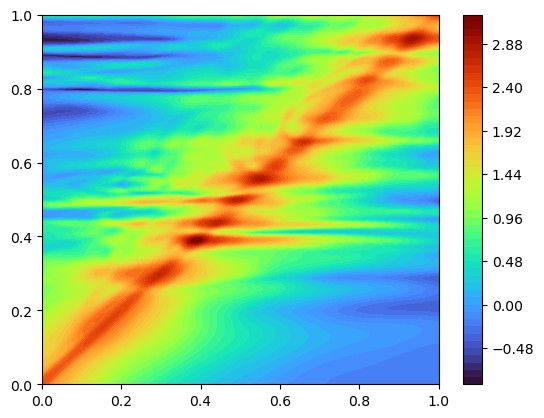

In [5]:
frac.G[0.8].plot()

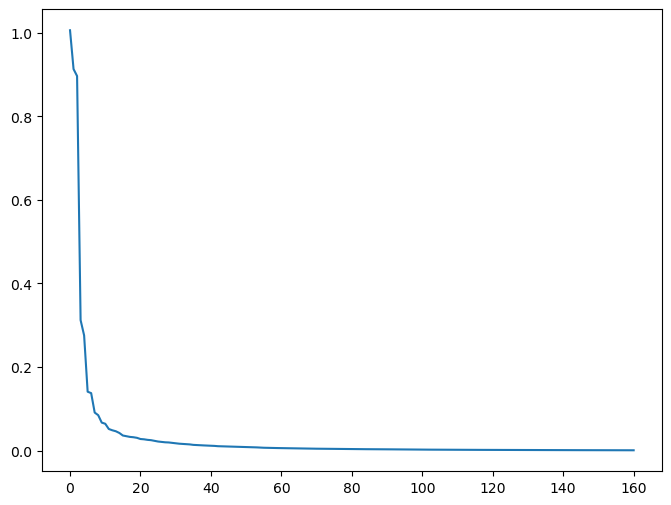

In [6]:
fig = plt.figure(figsize = (8,6))
plt.plot(s)

(0.0, 1.0)

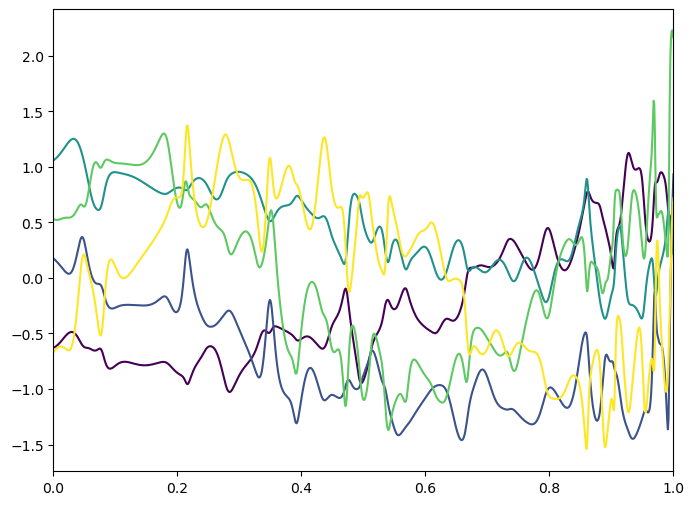

In [7]:
# i = slice(10,20)
i = slice(0,5)
# i = 16
fig = plt.figure(figsize = (8,6))
u[:,i].plot(fig = fig)
# print(np.max(u[:,i].vscale))
# plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [9]:
# %%time
# theta_ = 0.85
# Ginterp = frac.generateNewModel(theta_)

In [10]:
# validation = ChebGreen(theta_, domain, generateData, script, example, homogeneousBC)

In [11]:
# def compareGreen1D(interpModel, exactModel, vmin = None, vmax = None):
#     domain = interpModel.domain
#     xx = np.linspace(domain[2],domain[3],2000)
#     yy = np.linspace(domain[0],domain[1],2000)
#     x, s = np.meshgrid(xx,yy)
    
#     if vmin is None:
#         vmin = min(interpModel.min,exactModel.min)
#     if vmax is None:
#         vmax = max(interpModel.max,exactModel.max)
        
#     plt.figure(figsize = (16,6))
#     plt.subplot(121)
    
#     GInterp = interpModel[x,s]
    
#     levels = np.linspace(vmin, vmax, 50, endpoint = True)
#     ticks = np.linspace(vmin, vmax, 10, endpoint=True)
    
#     surf = plt.contourf(x, s, GInterp, levels = levels, cmap = 'turbo', vmin = vmin, vmax = vmax)
#     plt.gca().set_aspect('equal', adjustable='box')
#     cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)
#     cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
#     plt.xlabel('$x$', fontsize = 11)
#     plt.ylabel('$s$', rotation='horizontal', labelpad=10, fontsize = 11)
#     plt.title("Interpolated", fontsize = 14)
    
#     GExact = exactModel[x,s]
    
#     plt.subplot(122)
#     plt.gca().set_aspect('equal', adjustable='box')
#     surf = plt.contourf(x, s, GExact, levels = levels, cmap = 'turbo', vmin = vmin, vmax = vmax)
#     cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)
#     cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
#     plt.xlabel('x', fontsize = 11)
#     plt.ylabel('s', rotation='horizontal', labelpad=10, fontsize = 11)
#     plt.title("Data", fontsize = 14)

In [12]:
# compareGreen1D(Ginterp,validation.G)

In [13]:
# e = Ginterp-validation.G[theta_]

In [14]:
# e.plot()

In [15]:
# e.norm()/validation.G[theta_].norm()